# <font color="blue">CALL OPTION - OPEN INTEREST & STOCK PRICE

CORRELATION BETWEEN CALL OPTION AND STOCK TRADING 

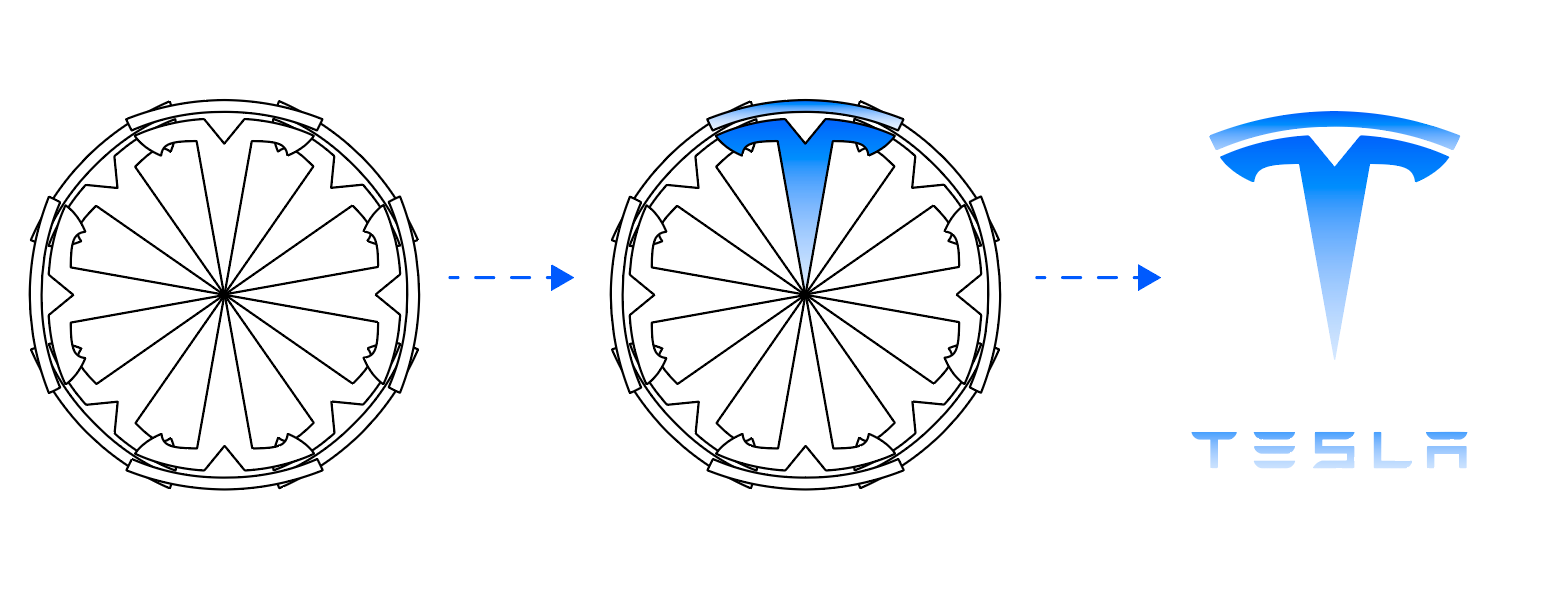

## EXPIRATION DATE: 02 JUNE 2023

#### Hemant Thapa

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import yfinance as yf
import ta

The correlation between call options and day trading refers to the relationship between these two trading strategies and how they may impact each other. Call options are derivative contracts that give the holder the right to buy an underlying asset at a predetermined price within a specified time period. Day trading, on the other hand, involves buying and selling financial instruments within the same trading day to profit from short-term price fluctuations.

While call options and day trading are distinct strategies, there can be some correlation between them. Traders who engage in day trading may consider using call options as part of their overall trading strategy to capitalize on anticipated price movements. For example, they may purchase call options on stocks or other assets they expect to increase in value during the day, allowing them to potentially amplify their gains.

Conversely, the activity of day traders can also impact the prices of call options. Increased trading volume and volatility resulting from day trading activity can affect the pricing and liquidity of call options. Day traders' actions can influence the supply and demand dynamics in the options market, potentially impacting the premiums and execution prices of call options.

It's important to note that the correlation between call options and day trading can vary depending on market conditions, the specific assets being traded, and individual trading strategies. Traders should carefully assess the risks and rewards associated with both call options and day trading and consider their investment objectives and risk tolerance before incorporating these strategies into their trading approach.

In [40]:
df = pd.read_excel('Desktop/tesla_02_june_2023.xlsx')

In [41]:
df.columns

Index(['Contract name', 'Last trade date', 'Strike', 'Last price', 'Bid',
       'Ask', 'Change', '% change', 'Volume', 'Open interest',
       'Implied volatility'],
      dtype='object')

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.shape

(86, 11)

In [6]:
df.dtypes

contract name          object
last trade date        object
strike                float64
last price            float64
bid                   float64
ask                   float64
change                float64
% change               object
volume                 object
open interest           int64
implied volatility    float64
dtype: object

In [7]:
df["volume"] = pd.to_numeric(df["volume"], errors='coerce')

In [8]:
df.dtypes

contract name          object
last trade date        object
strike                float64
last price            float64
bid                   float64
ask                   float64
change                float64
% change               object
volume                float64
open interest           int64
implied volatility    float64
dtype: object

In [9]:
df[:5]

,contract name,last trade date,strike,last price,bid,ask,change,% change,volume,open interest,implied volatility
0,TSLA230602C00020000,2023-06-01 2:18PM EDT,20.0,188.55,188.10,188.25,8.95,0.0498,73.0,9,0.0000
1,TSLA230602C00030000,2023-06-01 10:20AM EDT,30.0,172.20,178.05,178.20,28.20,0.1958,2.0,0,0.0000
2,TSLA230602C00040000,2023-05-19 3:51PM EDT,40.0,140.20,168.20,168.40,0.00,-,2.0,1,0.0000
3,TSLA230602C00050000,2023-06-01 10:56AM EDT,50.0,152.49,158.05,158.45,20.57,0.1559,80.0,82,5.0000
4,TSLA230602C00070000,2023-05-25 10:14AM EDT,70.0,111.00,138.10,138.55,0.00,-,1.0,5,5.8828


In [10]:
tesla = yf.download("TSLA", period="1d", interval="5m")

[*********************100%***********************]  1 of 1 completed


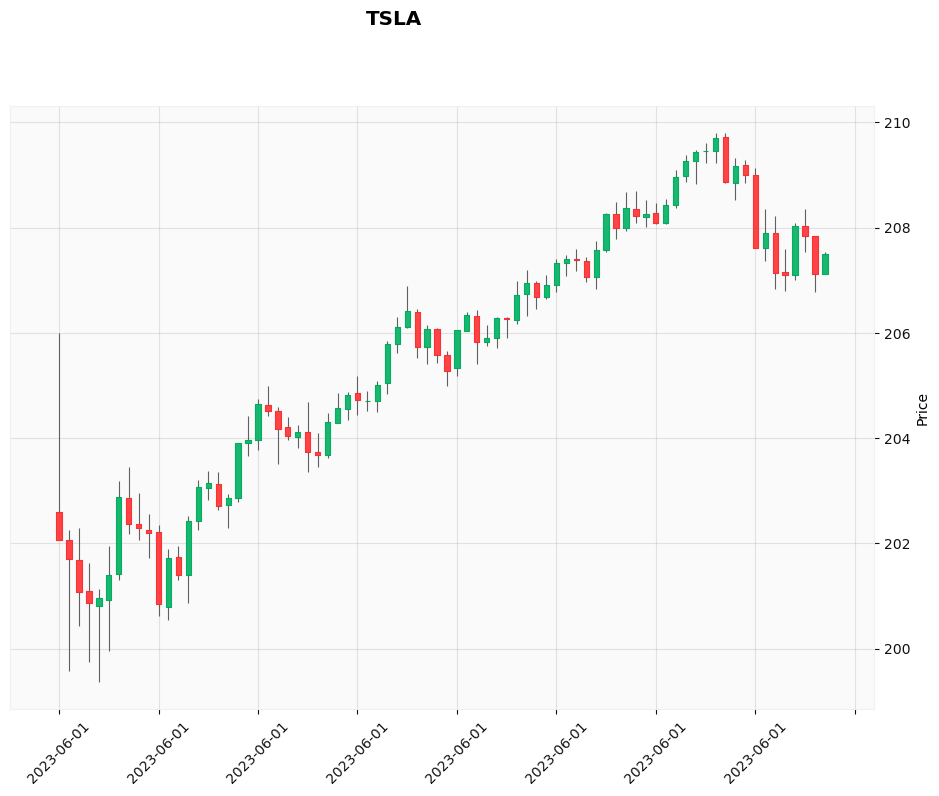

In [11]:
fig, axes = mpf.plot(tesla, type='candle', style='yahoo', ylabel='Price', title='TSLA',
                     datetime_format='%Y-%m-%d', volume=False, returnfig=True, figscale=1.5)

for ax in axes:
    ax.grid(color='grey', alpha=0.20)  

mpf.show()

In [12]:
tesla.shape

(78, 6)

In [13]:
tesla[:10]

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-06-01 09:30:00-04:00,202.589996,205.990005,202.059998,202.059998,202.059998,9669584
2023-06-01 09:35:00-04:00,202.059998,202.249802,199.580002,201.710007,201.710007,5346080
2023-06-01 09:40:00-04:00,201.690094,202.300003,200.440002,201.082596,201.082596,3391314
2023-06-01 09:45:00-04:00,201.104996,201.625000,199.750000,200.869995,200.869995,3514345
2023-06-01 09:50:00-04:00,200.820007,201.139999,199.369995,200.955002,200.955002,2936342
2023-06-01 09:55:00-04:00,200.929993,201.960007,199.950607,201.406097,201.406097,2739650
2023-06-01 10:00:00-04:00,201.419998,203.179993,201.310104,202.884796,202.884796,3198820
2023-06-01 10:05:00-04:00,202.860001,203.449997,202.179993,202.360397,202.360397,2614946
2023-06-01 10:10:00-04:00,202.369995,202.960007,202.059998,202.289993,202.289993,2019282


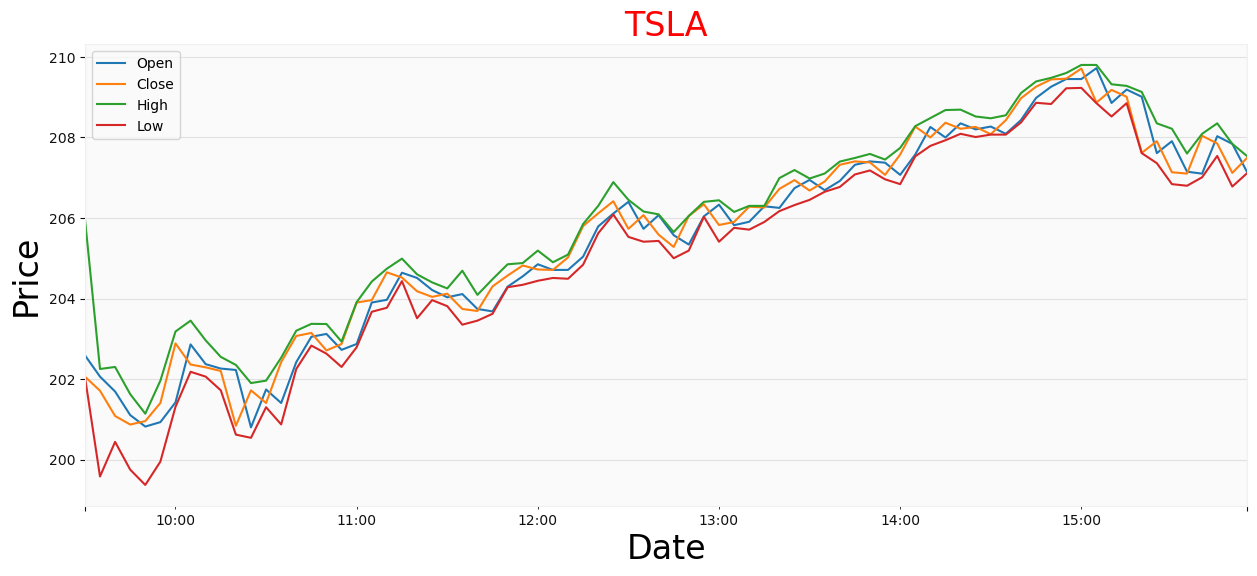

In [14]:
plt.figure(figsize=(15, 6)) 
tesla.Open.plot()
tesla.Close.plot()
tesla.High.plot()
tesla.Low.plot()
plt.title("TSLA",fontsize=24, color="red")
plt.ylabel('Price', fontsize=24) 
plt.xlabel('Date', fontsize=24)
plt.grid(color='grey', alpha=0.20)
plt.legend()
plt.show()

In [15]:
tesla['SMA_9'] = tesla["Close"].rolling(9).mean()

In [16]:
tesla['SMA_12'] = tesla["Close"].rolling(12).mean()

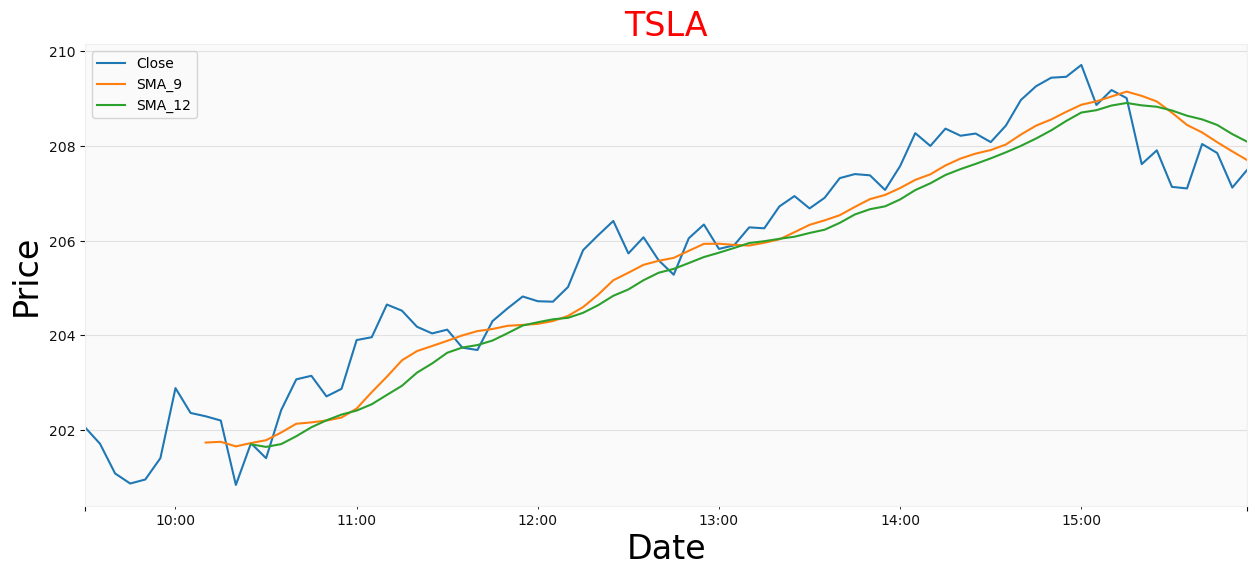

In [17]:
plt.figure(figsize=(15, 6)) 
tesla.Close.plot()
tesla.SMA_9.plot()
tesla.SMA_12.plot()
plt.title("TSLA",fontsize=24, color="red")
plt.ylabel('Price', fontsize=24) 
plt.xlabel('Date', fontsize=24)
plt.grid(color='grey', alpha=0.20)
plt.legend()
plt.show()

In [18]:
import matplotlib.ticker as ticker

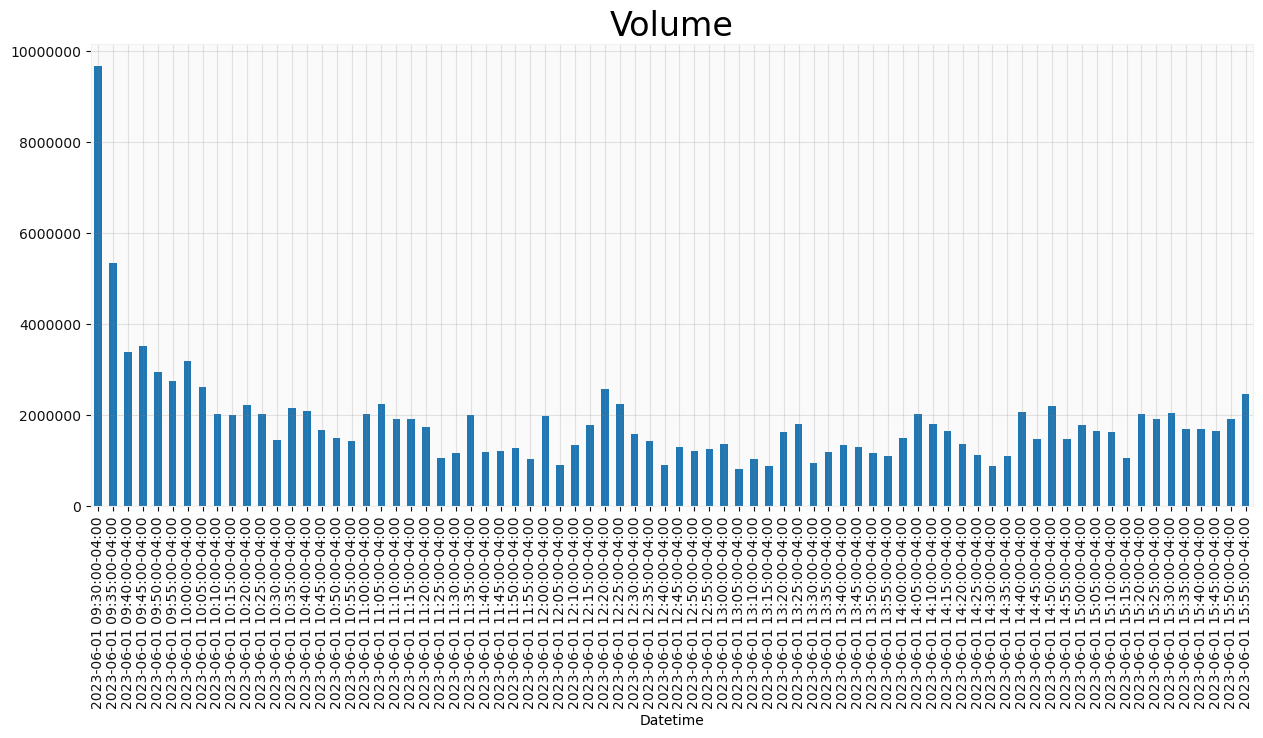

In [19]:
plt.figure(figsize=(15, 6))
tesla.Volume.plot(kind="bar")
plt.ticklabel_format(style='plain', axis='y') 
plt.title("Volume", fontsize=24)
plt.grid(color='grey', alpha=0.20)
plt.show()

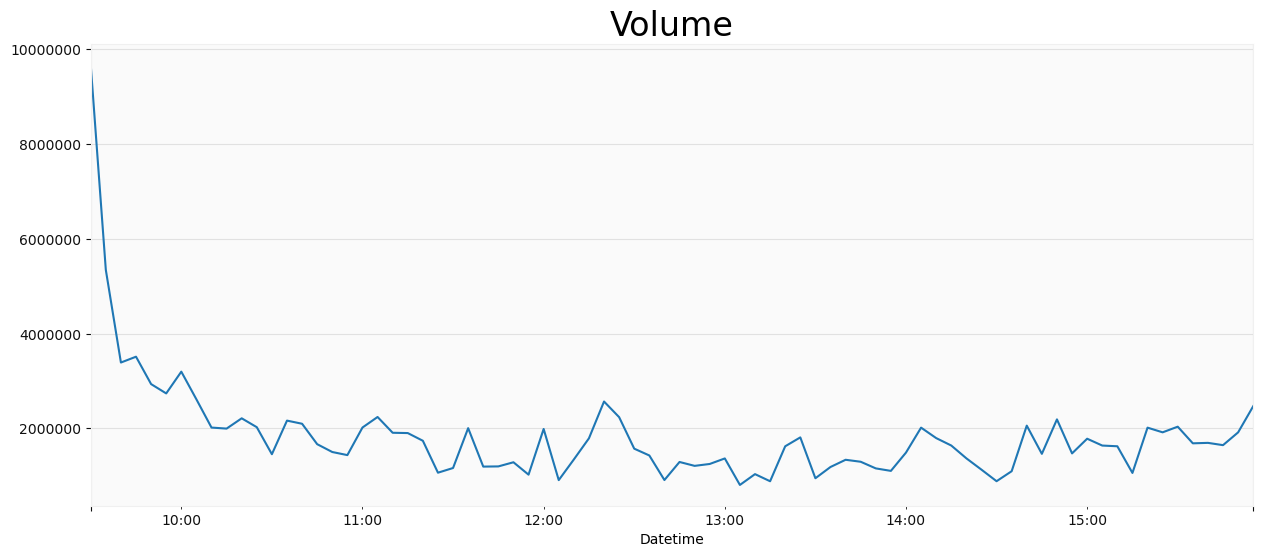

In [20]:
plt.figure(figsize=(15, 6))
tesla.Volume.plot()
plt.ticklabel_format(style='plain', axis='y') 
plt.title("Volume", fontsize=24)
plt.grid(color='grey', alpha=0.20)
plt.show()

In [23]:
#stochastic oscillator
tesla['%K'] = ta.momentum.stoch(tesla['High'], tesla['Low'], tesla['Close'])
#Smoothing with a 3-period moving average
tesla['%D'] = tesla['%K'].rolling(3).mean() 

Stochastic Oscillator, %K and %D are two key components used to analyze price momentum and identify potential overbought and oversold conditions.

1. %K represents the fast stochastic line, which measures the current closing price's position relative to the high-low range over a specified period. 

### %K = (Current Close - Lowest Low) / (Highest High - Lowest Low) * 100

2. %D represents the slow stochastic line, which is a moving average of %K and helps smooth out the fluctuations. It is typically calculated as a simple moving average of %K over a specified period.

Horizontal lines indicating the overbought (at 80) and oversold (at 20) levels.

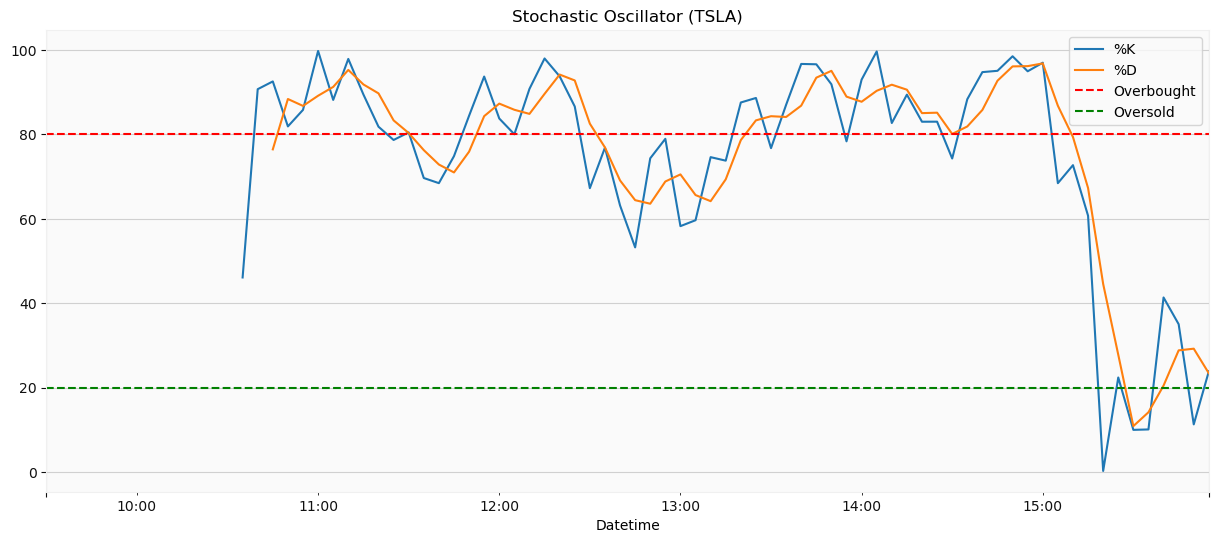

In [30]:
fig, ax = plt.subplots(figsize=(15, 6))
tesla[['%K', '%D']].plot(ax=ax, title='Stochastic Oscillator (TSLA)')
ax.axhline(80, color='red', linestyle='--', label='Overbought')
ax.axhline(20, color='green', linestyle='--', label='Oversold')
ax.legend()
plt.show()

In [ ]:
df.describe()

In [25]:
top_10_volume = df.nlargest(10, 'volume')

In [26]:
top_10_volume

,contract name,last trade date,strike,last price,bid,ask,change,% change,volume,open interest,implied volatility
52,TSLA230602C00205000,2023-06-01 2:24PM EDT,205.0,4.59,4.50,4.60,1.19,0.35,182881.0,26946,0.4107
54,TSLA230602C00210000,2023-06-01 2:24PM EDT,210.0,1.99,1.96,1.98,0.25,0.1437,149267.0,31159,0.4346
53,TSLA230602C00207500,2023-06-01 2:24PM EDT,207.5,3.10,3.05,3.10,0.64,0.2602,85181.0,14106,0.4231
50,TSLA230602C00200000,2023-06-01 2:24PM EDT,200.0,8.60,8.55,8.70,2.50,0.4098,62858.0,34009,0.4121
51,TSLA230602C00202500,2023-06-01 2:24PM EDT,202.5,6.50,6.35,6.50,2.00,0.4444,60942.0,16347,0.4063
58,TSLA230602C00220000,2023-06-01 2:24PM EDT,220.0,0.29,0.28,0.29,-0.15,-0.3409,50413.0,32172,0.5127
56,TSLA230602C00215000,2023-06-01 2:24PM EDT,215.0,0.77,0.76,0.77,-0.12,-0.1348,48414.0,16287,0.4736
55,TSLA230602C00212500,2023-06-01 2:24PM EDT,212.5,1.25,1.23,1.25,0.00,-,34455.0,10028,0.4546
57,TSLA230602C00217500,2023-06-01 2:23PM EDT,217.5,0.46,0.46,0.48,-0.15,-0.2459,14037.0,5588,0.4966
46,TSLA230602C00190000,2023-06-01 2:22PM EDT,190.0,18.15,18.10,18.45,3.85,0.2692,9331.0,10869,0.3750


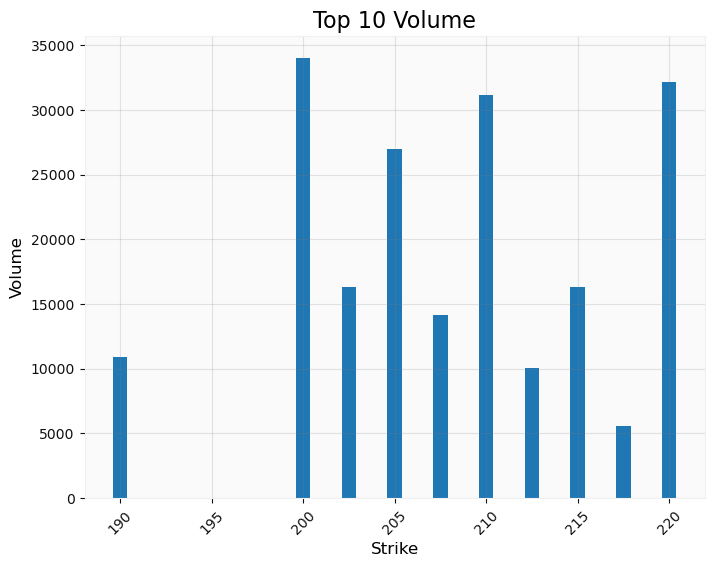

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.bar(top_10_volume['strike'],top_10_volume['open interest'])
plt.xticks(rotation=45, fontsize=10)
plt.xlabel('Strike', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.title('Top 10 Volume', fontsize=16)
plt.grid(color='grey', alpha=0.20)
plt.show()

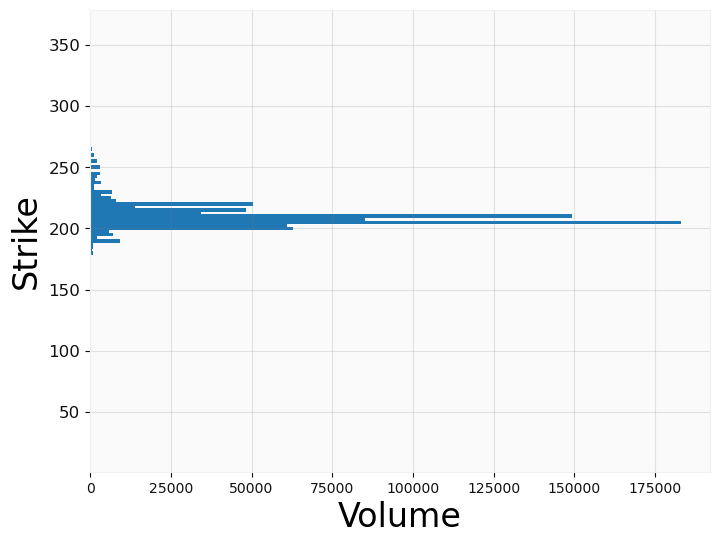

In [28]:
plt.figure(figsize=(8, 6))  
plt.barh(df['strike'], df['volume'], height=3) 
plt.yticks(rotation=0, fontsize=12) 
plt.ylabel('Strike', fontsize=24) 
plt.xlabel('Volume', fontsize=24)  
plt.grid(color='grey', alpha=0.20)
plt.show()

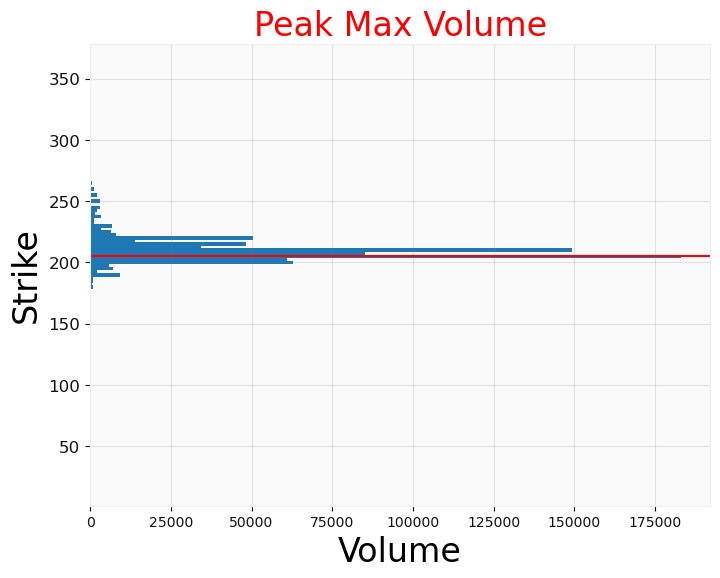

In [29]:
max_volume = df['volume'].max()
max_volume_strike = df.loc[df['volume'].idxmax(), 'strike']
plt.figure(figsize=(8, 6))
plt.barh(df['strike'], df['volume'], height=3)
plt.yticks(rotation=0, fontsize=12)
plt.title("Peak Max Volume",fontsize=24,color="red")
plt.ylabel('Strike', fontsize=24)
plt.xlabel('Volume', fontsize=24)
plt.grid(color='grey', alpha=0.20)
plt.axhline(y=max_volume_strike, color='red')
plt.show()

In [31]:
top_10_open_interest = df.nlargest(10, 'open interest')

In [32]:
top_10_open_interest

,contract name,last trade date,strike,last price,bid,ask,change,% change,volume,open interest,implied volatility
50,TSLA230602C00200000,2023-06-01 2:24PM EDT,200.0,8.60,8.55,8.70,2.50,0.4098,62858.0,34009,0.4121
58,TSLA230602C00220000,2023-06-01 2:24PM EDT,220.0,0.29,0.28,0.29,-0.15,-0.3409,50413.0,32172,0.5127
54,TSLA230602C00210000,2023-06-01 2:24PM EDT,210.0,1.99,1.96,1.98,0.25,0.1437,149267.0,31159,0.4346
52,TSLA230602C00205000,2023-06-01 2:24PM EDT,205.0,4.59,4.50,4.60,1.19,0.35,182881.0,26946,0.4107
51,TSLA230602C00202500,2023-06-01 2:24PM EDT,202.5,6.50,6.35,6.50,2.00,0.4444,60942.0,16347,0.4063
56,TSLA230602C00215000,2023-06-01 2:24PM EDT,215.0,0.77,0.76,0.77,-0.12,-0.1348,48414.0,16287,0.4736
48,TSLA230602C00195000,2023-06-01 2:24PM EDT,195.0,13.29,13.20,13.45,3.44,0.3492,7086.0,15114,0.2813
62,TSLA230602C00230000,2023-06-01 2:21PM EDT,230.0,0.06,0.06,0.07,-0.06,-0.5,6791.0,14486,0.6309
53,TSLA230602C00207500,2023-06-01 2:24PM EDT,207.5,3.10,3.05,3.10,0.64,0.2602,85181.0,14106,0.4231
46,TSLA230602C00190000,2023-06-01 2:22PM EDT,190.0,18.15,18.10,18.45,3.85,0.2692,9331.0,10869,0.3750


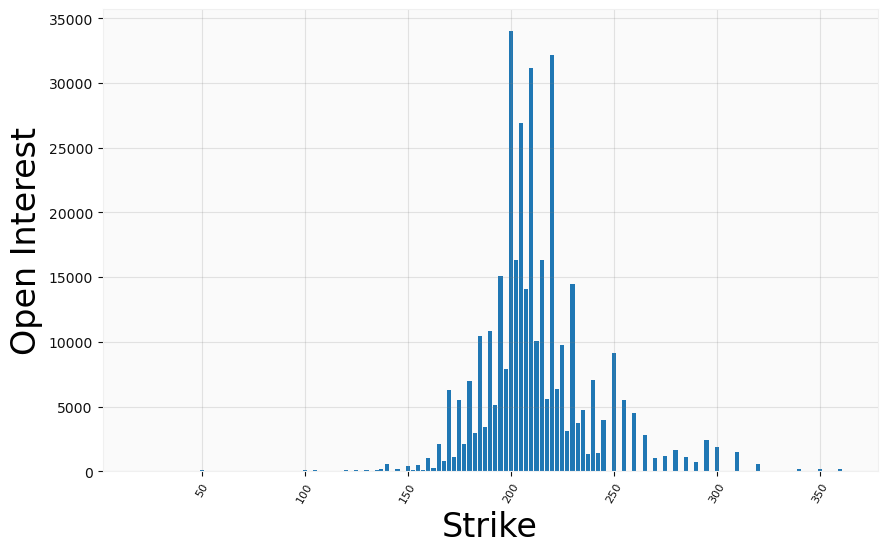

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(df['strike'],df['open interest'],width=2)
plt.xticks(rotation=60, fontsize=8)
plt.xlabel('Strike', fontsize=24)
plt.ylabel('Open Interest', fontsize=24)
plt.grid(color='grey', alpha=0.20)
plt.xticks(rotation=60, fontsize=8)
plt.show()

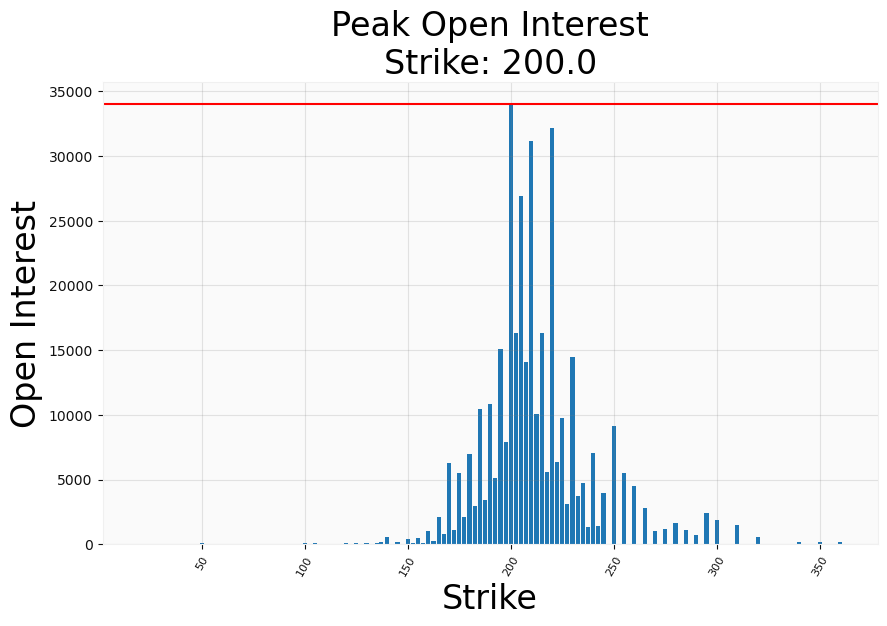

In [34]:
max_open_interest = df['open interest'].max()
max_open_interest_index = df['open interest'].idxmax()
max_open_interest_strike = df.loc[max_open_interest_index, 'strike']

plt.figure(figsize=(10, 6))
plt.bar(df['strike'], df['open interest'], width=2)
plt.xticks(rotation=60, fontsize=8)
plt.xlabel('Strike', fontsize=24)
plt.ylabel('Open Interest', fontsize=24)
plt.grid(color='grey', alpha=0.20)
plt.axhline(y=max_open_interest, color='red')
plt.title(f"Peak Open Interest\nStrike: {max_open_interest_strike}", fontsize=24)
plt.show()

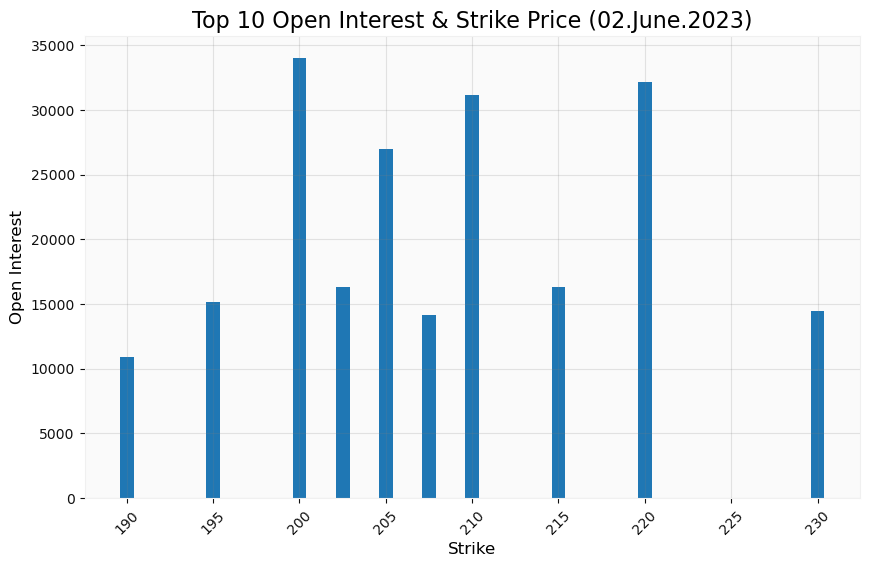

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(top_10_open_interest['strike'],top_10_open_interest['open interest'])
plt.xticks(rotation=45, fontsize=10)
plt.xlabel('Strike', fontsize=12)
plt.ylabel('Open Interest', fontsize=12)
plt.title('Top 10 Open Interest & Strike Price (02.June.2023)', fontsize=16)
plt.grid(color='grey', alpha=0.20)
plt.show()

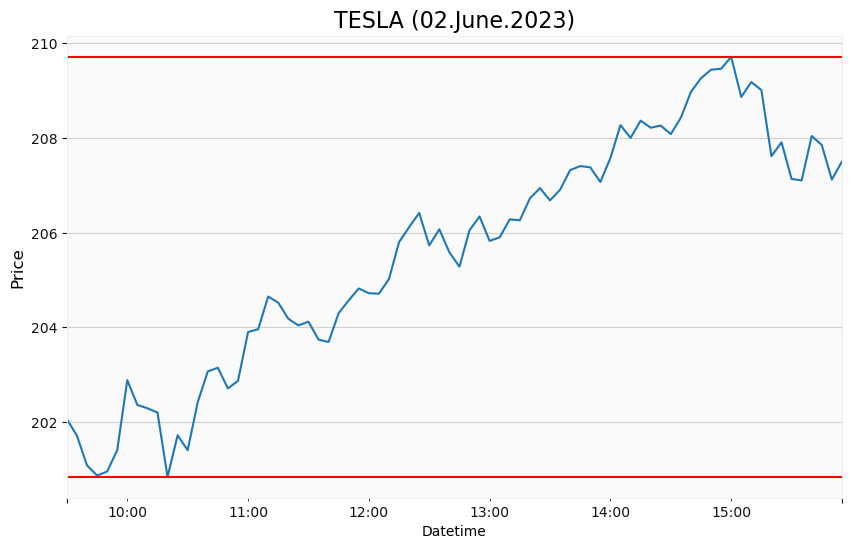

In [36]:
plt.figure(figsize=(10, 6))
tesla.Close.plot()
plt.ylabel('Price', fontsize=12)
plt.title('TESLA (02.June.2023)', fontsize=16)
plt.axhline(min(tesla.Close), color="red")
plt.axhline(max(tesla.Close), color="red")
plt.show()
plt.close()

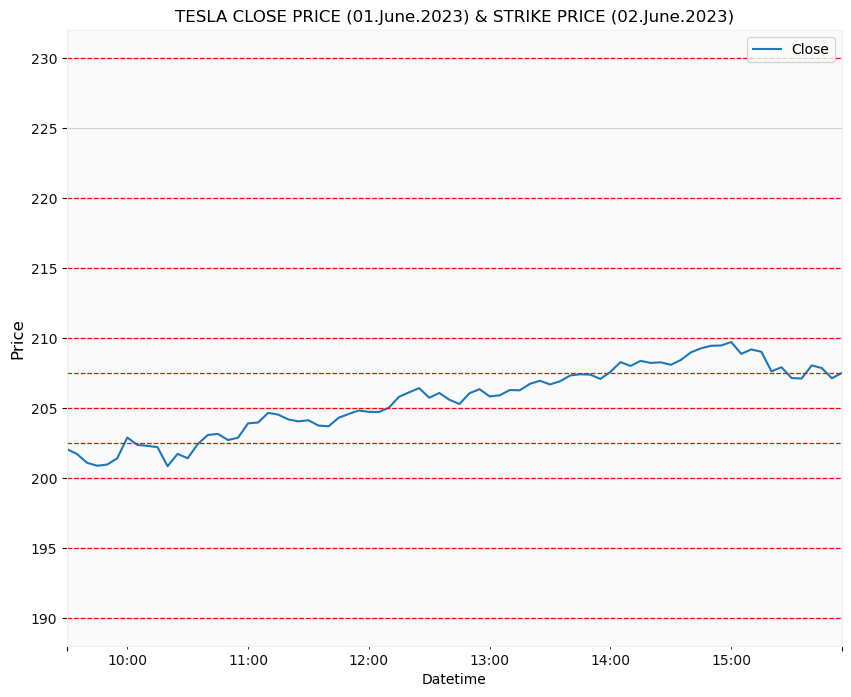

In [37]:
plt.figure(figsize=(10, 8))
tesla.Close.plot()
plt.ylabel('Price', fontsize=12)
plt.title('TESLA CLOSE PRICE (01.June.2023) & STRIKE PRICE (02.June.2023)', fontsize=12)
for strike_price in top_10_open_interest['strike']:
    plt.axhline(strike_price, color="red", linestyle="--", linewidth=0.9)
plt.legend()
plt.show()

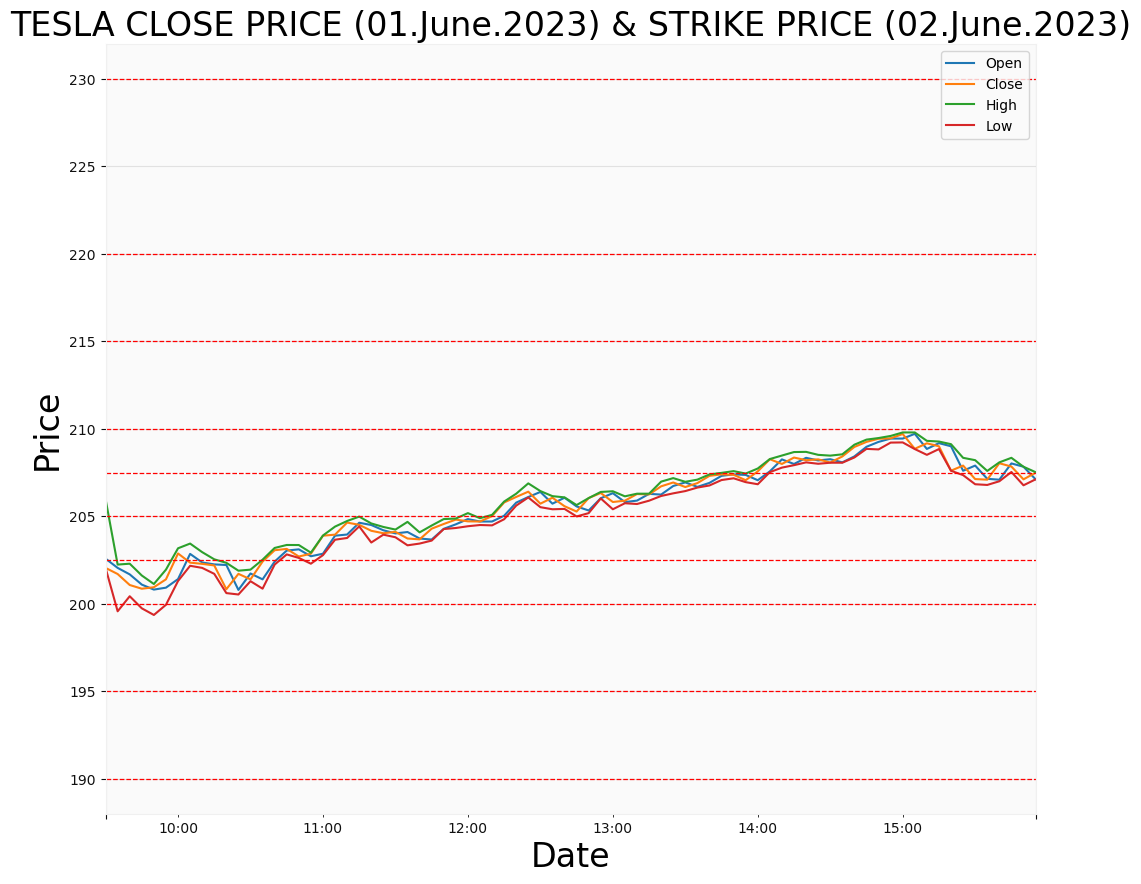

In [38]:
plt.figure(figsize=(12, 10)) 
tesla.Open.plot()
tesla.Close.plot()
tesla.High.plot()
tesla.Low.plot()
plt.ylabel('Price', fontsize=12)
plt.title('TESLA CLOSE PRICE (01.June.2023) & STRIKE PRICE (02.June.2023)', fontsize=24)
for strike_price in top_10_open_interest['strike']:
    plt.axhline(strike_price, color="red", linestyle="--", linewidth=0.9)
plt.ylabel('Price', fontsize=24) 
plt.xlabel('Date', fontsize=24)
plt.grid(color='grey', alpha=0.20)
plt.legend()
plt.show()

#### Horizontal line are strike price for call option 02.June.2023, which can also be consider as support.  

The strike price with the highest open interest in option trading can be considered as a potential support level for the Tesla stock. Open interest represents the total number of outstanding option contracts at a particular strike price. When there is a high open interest at a specific strike price, it suggests that there is a significant number of traders holding positions at that level.

Traders often look at high open interest levels as potential support or resistance levels. In the case of the highest open interest strike price, it can act as a support level because there is a large number of option contracts held at that price, indicating that many traders are interested in buying the stock at that level.